<a href="https://colab.research.google.com/github/jovitaand/UCI-Bank-Marketing-Dataset/blob/main/UCI_Bank_Marketing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCI Bank Marketing Dataset

This dataset is related to direct marketing campaigns of a Portuguese banking institution. It is available here in the data folder, and can be found online ("Bank Marketing" dataset ) in the in the UCI Machine Learning Repository. The dataset includes the following features:

Age
Job type
Marital status
Education level
Default history
Housing loan
Personal loan
Contact communication type
Month of last contact
Day of the week of last contact
Duration of last contact
Campaign details
Previous campaign details
Economic indicators
Assignment

Your goal is to use K-means analysis and logistic regression to process this data. Imagine you have been hired as a consulant by the marketing team for the bank to answer the following questions:

How do customers segment? Can you identify different, distinctive features that characterize these different segments?
Can you predict which customers will subscribe to a term deposit?
How does the likelihood of subscription correlate with the customer segments?
What advice do you have for where to put our marketing dollars right now?

# Load the dataset
All the data is stored in a zip folder called bank-full.csv

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("bank-full.csv",sep=";")

- age (numeric)

- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unnon')

- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- default: has credit in default? (categorical: 'no','yes','unknown')

    balance

- housing: TEMPhas housing loan? (categorical: 'no','yes','Unknown')

- loan: TEMPhas personal loan? (categorical: 'no','yes','unknow')
Related wif the last contact of the current campaign

- contact: contact communication type (categorical: 'cellular','telephone')

- day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- duration: last contact duration, in seconds (numeric). Important note: dis attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not non before a call is performed. Also, after the end of the call y is obviously non. Thus, dis input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Other attributes

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: number of days dat passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client (numeric)

- poutcome: outcome of teh previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
data.head() #checking whether the data has been updated

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.describe() #shows the summary of central tendency,dispersion, and shape of the distribution of the dataset

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.info() # gives you the concise summary of the dataframe 'data' with the total rows,columns and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Summary: From the dataset we can identify that columns: 'age' , 'balance' , 'day' , 'duration' , ' campaign', ' pdays', and 'previous' contain numeric values and columns: 'job' , 'martial','education','default','housing','loan','contact','month','poutcome', and 'y' contain categorical values.

## Creating a correlations between the numeric columns in the 'data' dataframe

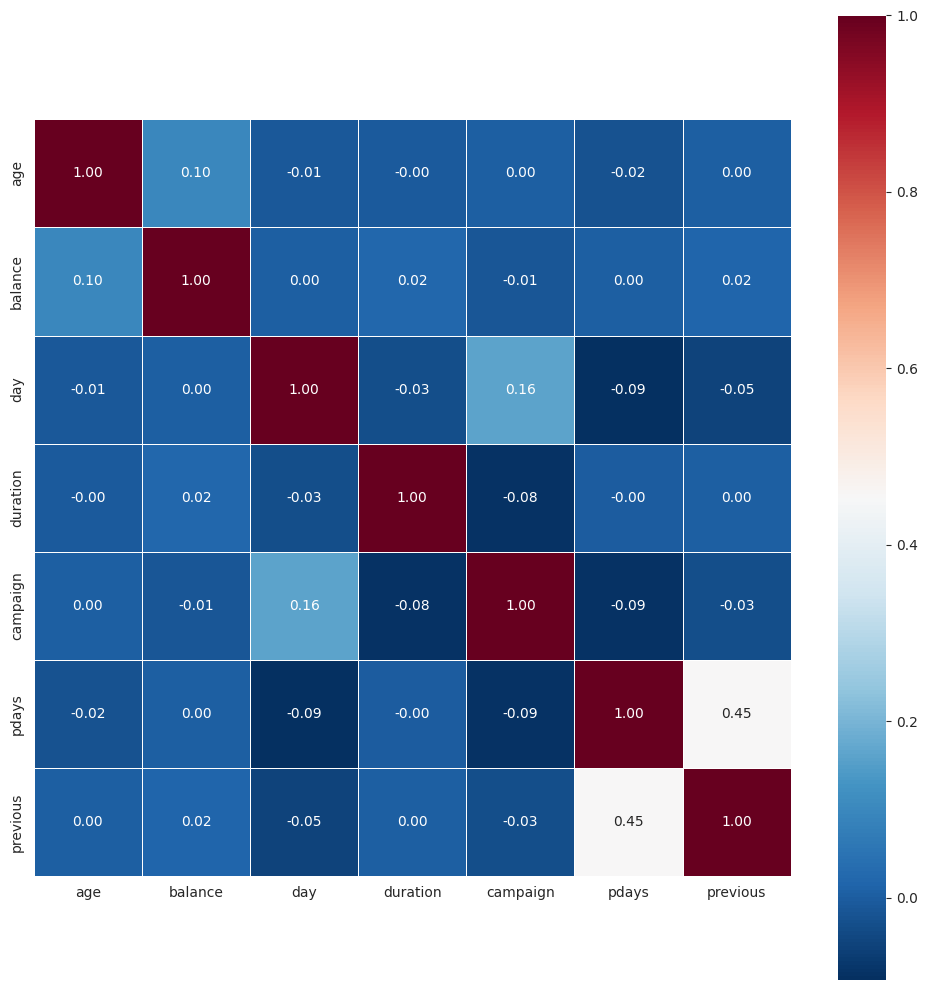

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  #This initializes a Matplotlib figure and axis object with a specified size of 10x10.
sns.heatmap(data._get_numeric_data().astype(float).corr(), #This extracts only the numeric columns from the data DataFrame
            square=True, cmap='RdBu_r', linewidths=.5, #This is a Seaborn function that creates a heatmap. The heatmap's color intensity and range (from red to blue in this case, as specified by cmap='RdBu_r') represent the magnitude and direction of correlations.square=True: This makes cells square-shaped.cmap='RdBu_r': This specifies the color map (red to blue).linewidths=.5: This sets the width of the lines that will divide each cell.annot=True: This adds the correlation values to the cells.fmt='.2f': This formats the correlation values to two decimal places.
            annot=True, fmt='.2f').figure.tight_layout() #This ensures that the layout is tight, so everything fits in the figure.
plt.show() #this displays the figure


# Visualizing the "data" DataFrame

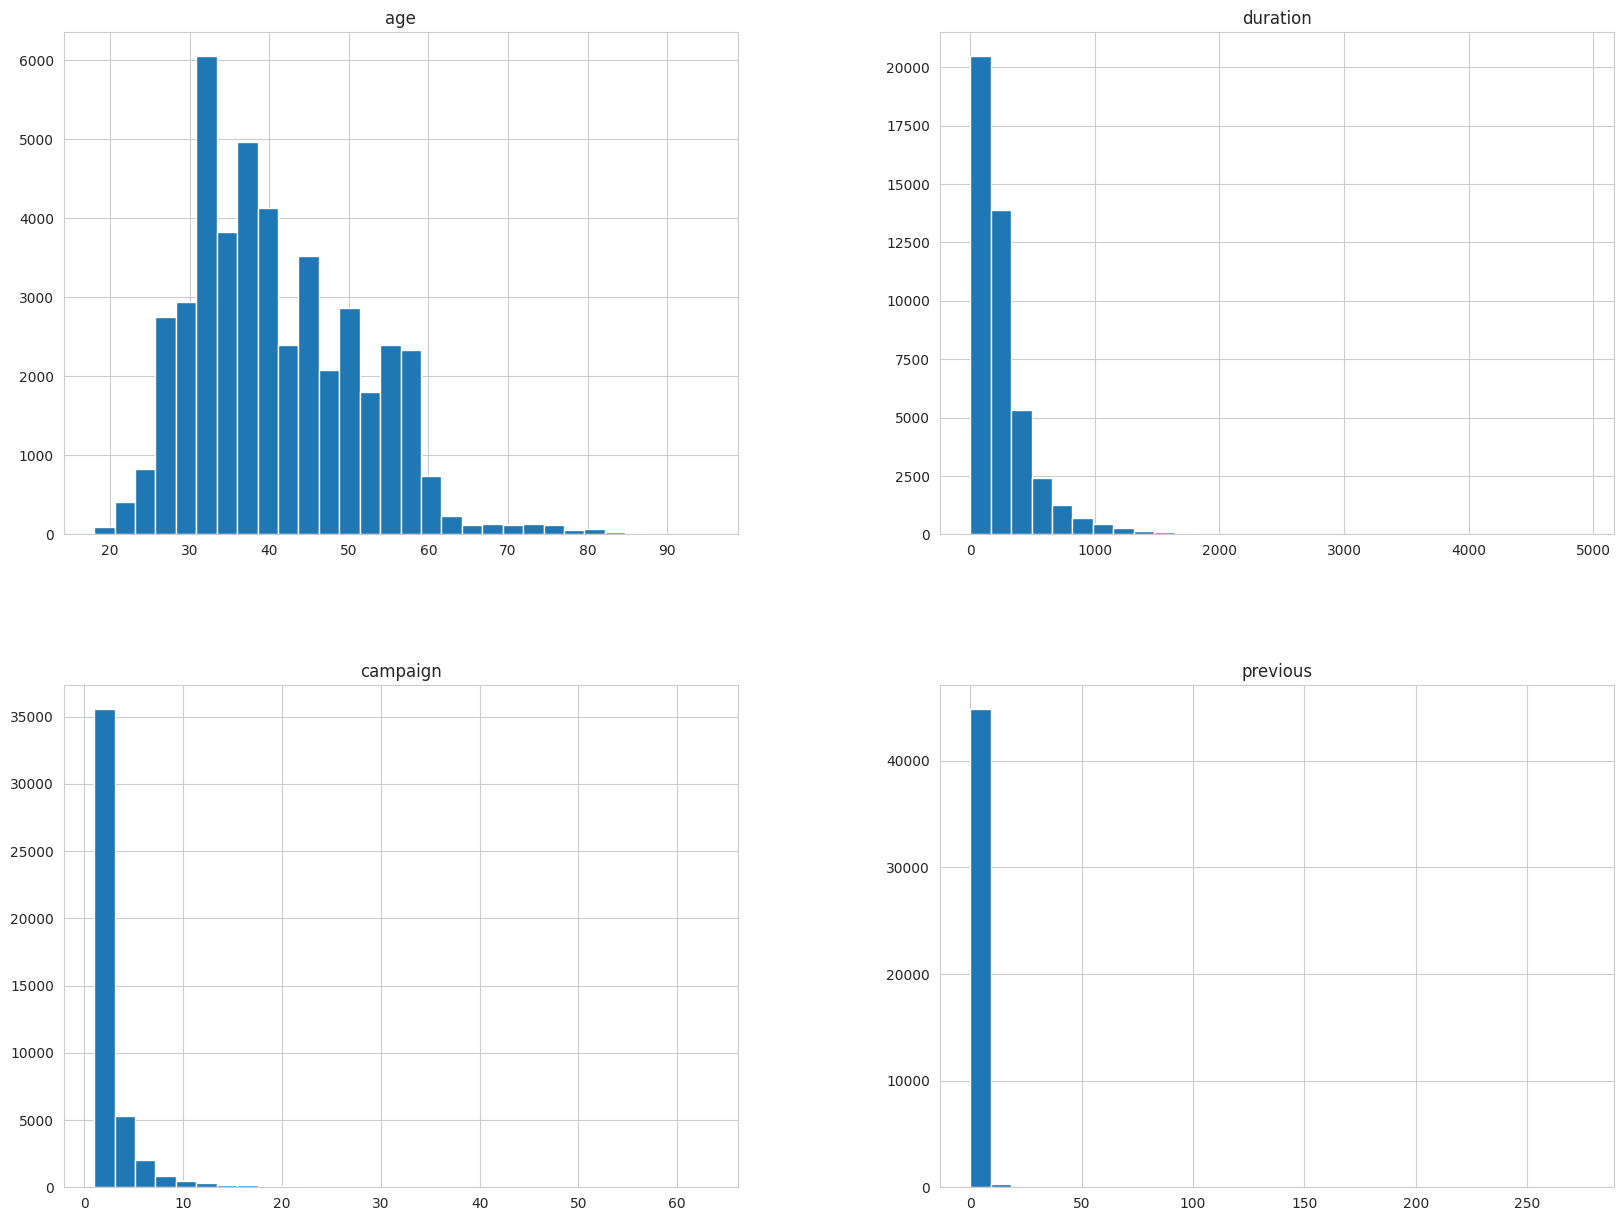

In [ ]:
%matplotlib inline
data[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")
    print(data[col].value_counts(), "\n")

print(data.nunique(axis=1))

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

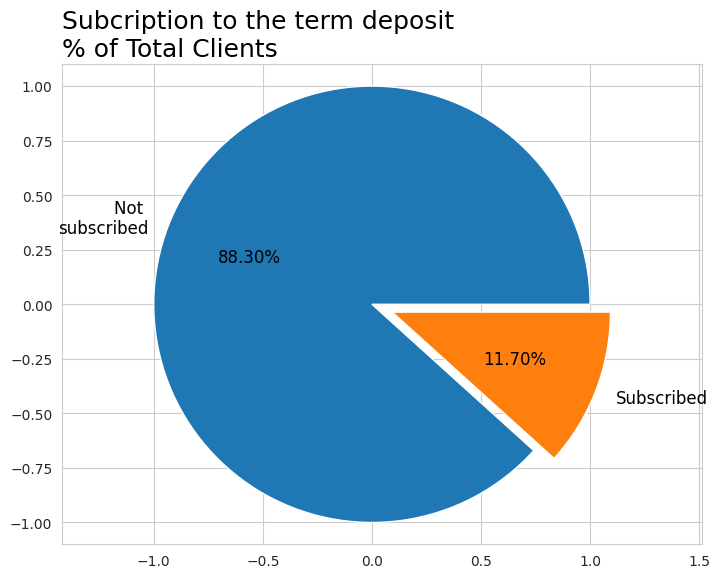

In [ ]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(data['y'].value_counts(),
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12))

ax.axis('equal')
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black',
     fontsize = '18')

plt.show()

which customers are likelly to subscribe for term desposit

Text(0, 0.5, 'Frequency of Purchase')

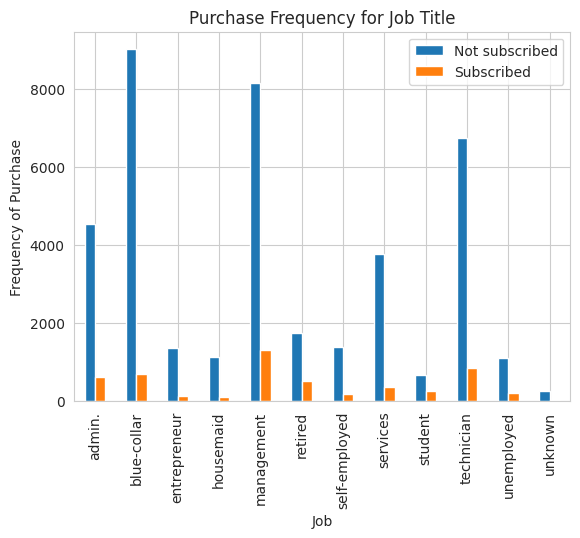

In [ ]:
table = pd.crosstab(data.job, data.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Convert categorical variables**: Use one - hot encoding for categorical features

In [ ]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [ ]:
data.head(5)

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1


**Convert target column**: Convert 'y' column to binary (0 and 1)

In [ ]:
# Applying PCA for dimensionality reduction
X = pd.get_dummies(data.drop(columns=['y']))
pca = PCA(n_components=10)
full_data_pca = pca.fit_transform(X)

# Applying KMeans clustering with 3 clusters on the PCA-reduced dataset
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(full_data_pca)

# Adding the cluster labels to the original dataset
data['cluster'] = clusters

# Calculating the subscription rates for each cluster
subscription_rates = data.groupby('cluster')['y'].value_counts(normalize=True).unstack().fillna(0)
subscription_rates['subscription_rate'] = subscription_rates['yes'] * 100  # in percentage

subscription_rates[['subscription_rate']]

y,subscription_rate
cluster,
0,11.188363
1,12.944984
2,16.374942


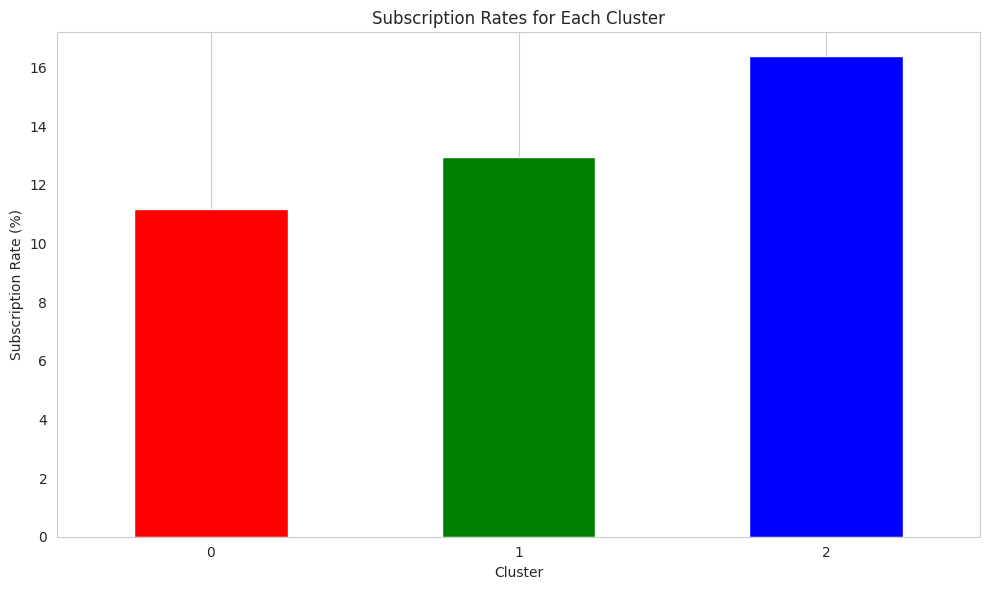

In [ ]:
# Visualizing the subscription rates for each cluster
plt.figure(figsize=(10, 6))
subscription_rates['subscription_rate'].plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Subscription Rates for Each Cluster')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# **KMeans Clustering**

 Standardize the data

In [ ]:
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [ ]:
data.head(5)

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,cluster
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#features = data.drop("y", axis=1)
data_scaled = scaler.fit_transform(data)

Find the optimal number of clusters (k):

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plot the results

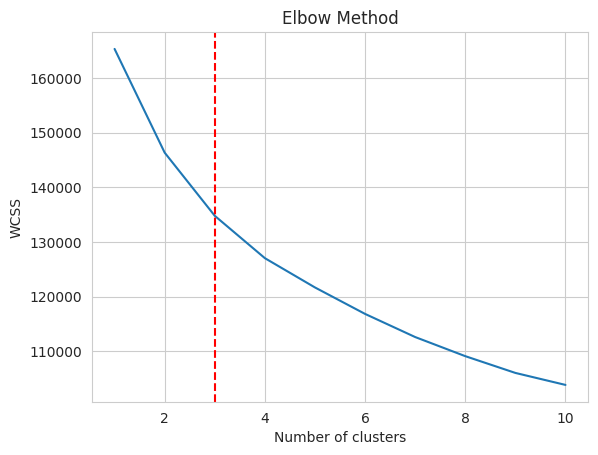

In [ ]:
plt.plot(range(1, 11), wcss)
plt.axvline(3, linestyle='--', c='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

In [ ]:
print(y_kmeans)

[1 0 0 ... 2 2 2]


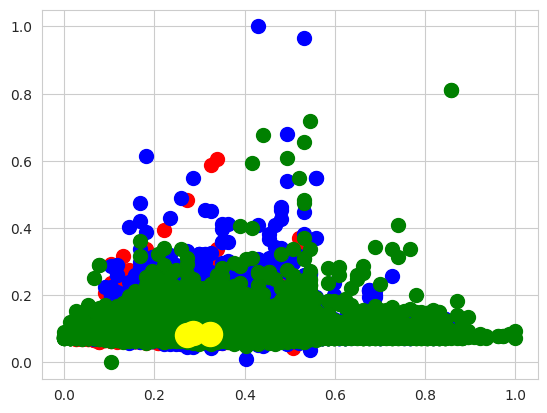

In [ ]:
#6 Visualising the clusters
plt.scatter(data_scaled[y_kmeans==0, 0], data_scaled[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data_scaled[y_kmeans==1, 0], data_scaled[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data_scaled[y_kmeans==2, 0], data_scaled[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.show()

# **Logistic Regression**

We drop the duration column as it is not correlated of the categorical or numerical columns

In [ ]:
X= data.drop("y", axis=1)
y= data["y"]

In [ ]:
X.head(5) # checking if the columns have been updated

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,cluster
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Split data into training and test sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [ ]:
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [ ]:
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 89.1090860833407


Train logistic regression model:

Text(0.5, 36.72222222222221, 'Predicted Values')

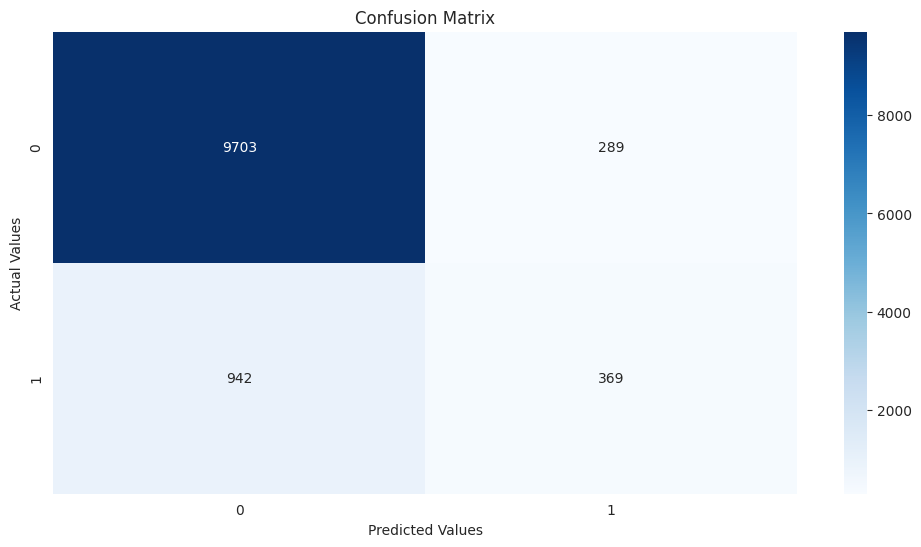

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

Evaluate the results

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9992
           1       0.56      0.28      0.37      1311

    accuracy                           0.89     11303
   macro avg       0.74      0.63      0.66     11303
weighted avg       0.87      0.89      0.87     11303



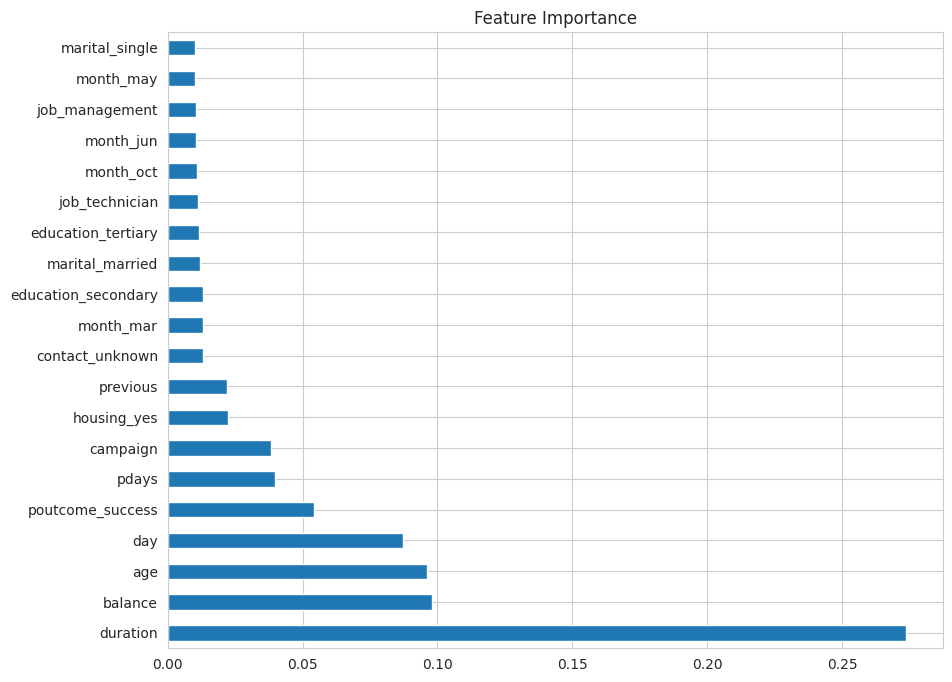

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, data['y'])

# Extract feature importances
importance = rf_classifier.feature_importances_

# Create a series with feature importances and plot the top 20
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8), title='Feature Importance')
plt.show()

In conclusion:
**How do customers segment? Can you identify different, distinctive features that characterize these different segments?**

We attempted to use KMeans clustering earlier, which is a common method to segment customers based on their features. Based on the results, we found that there might be 3 potential clusters or segments of customers.

Distinctive Features (from the KMeans analysis):

Cluster 0: Clients with the lowest average balances.

Cluster 1: Clients with significantly high average balances.

Cluster 2: Clients with average balances higher than Cluster 0 but much lower than Cluster 1.

The balance might be a key feature that distinguishes these clusters. Other features, like age or duration of contact, can also be analyzed to further characterize these segments.

**Can you predict which customers will subscribe to a term deposit?**

Using logistic regression, we developed a model to predict this. The model achieved an accuracy of approximately 89% on the test data. However, it was more effective in predicting the "no" class (did not subscribe) than the "yes" class (subscribed). This indicates that while the model is fairly accurate, it might miss a significant number of actual subscribers.

**How does the likelihood of subscription correlate with the customer segments?**

Based on the clusters identified:
Cluster 0: Subscription rate of 11.19%
Cluster 1: Subscription rate of 12.94%
Cluster 2: Subscription rate of 16.37%
Clients in Cluster 2 are more likely to subscribe to a term deposit than those in the other clusters.

**What advice do you have for where to put our marketing dollars right now?**

Focus on Cluster 2: Given their higher propensity to subscribe, targeting the clients in Cluster 2 might yield the best return on investment.
Personalized Campaigns for Cluster 1: Given the high average balances of clients in Cluster 1, it might be worth developing personalized campaigns or offers to entice them.
Re-evaluate Approach for Cluster 0: This group has the lowest average balances and the lowest subscription rates. It might be beneficial to re-evaluate the current approach and consider different strategies tailored to their needs.
Improve Prediction Model: The logistic regression model might benefit from further refinement or the use of other algorithms. Improving this model can help in more effectively targeting potential subscribers.